# Benchmarking
This is a first stab at making benchmarks from Python instead of shell/gnuplot, which is the method that has been used until now.
It may make sense to add code for generating new benchmark numbers, e.g. using one of the methods
[listed in this stackoverflow article](https://stackoverflow.com/questions/3652554/calling-java-from-python), or anything else really

The main motivation behind revamping the test setup is not really to use python, but to uncover more information about the
actual performance.  For instance, it seems like the regex matcher at present has an 18% disadvantage wrs to java matching.
However, that is based on the "unfair test", which is deliberately unfair, giving java a good chance to outperform rmatch.

Also the the test runs are short, and there may be benefit in running more extensive tests, both with respect to
length of input and with respect to number of regular expressions.  The complexity of the expressions should also be
variable.

However, the idea of benchmarking towards the java regex library is still a good one, and one that the revamped test regime should
build on.



In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import os

TODO: Maybe fix the date formatting using [this trick](https://stackoverflow.com/questions/23294197/plotting-chart-with-epoch-time-x-axis-using-matplotlib).

In [196]:
df0 = pd.read_csv('rmatch-tester/measurements/handle-the-wuthering-heights-corpus.csv')
df1 = df0.tail(5)

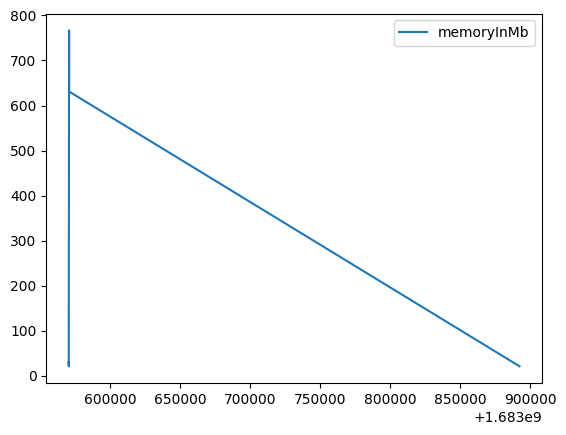

In [197]:
plt.plot(df1["secondsSinceEpoch"], df1["memoryInMb"], label="memoryInMb")
plt.legend()
plt.show()

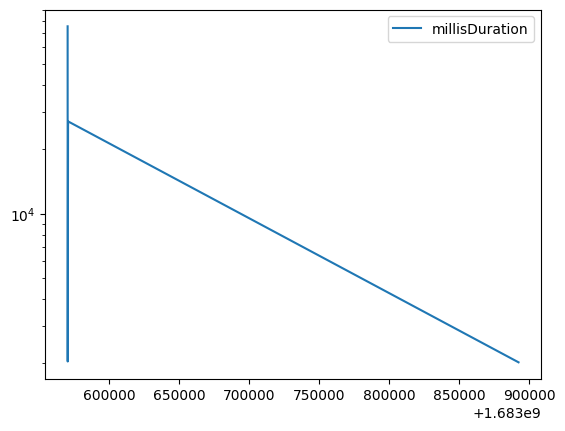

In [198]:
plt.plot(df1["secondsSinceEpoch"], df1["millisDuration"], label="millisDuration")
plt.yscale("log")
plt.legend()
plt.show()

In [199]:
df = pd.read_csv('rmatch-tester/logs/logfile-2023-05-08-20:37:45.csv')

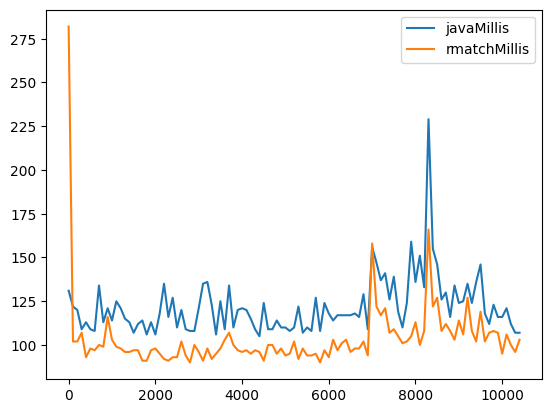

In [200]:
plt.plot(df["NoOfRegexps"], df[" javaMillis"], label="javaMillis")
plt.plot(df["NoOfRegexps"], df[" regexMillis"], label="rmatchMillis")
plt.legend()
plt.show()

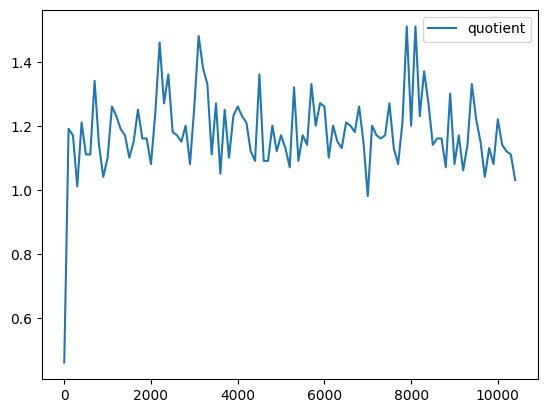

In [201]:
plt.plot(df["NoOfRegexps"], df[" quotient"], label="quotient")
plt.legend()
plt.show()

In [202]:
df[" quotient"].std()

0.12511474586834134

In [203]:
df[" quotient"].mean()

1.181047619047619

In [204]:
df[" javaMillis"].std()

16.22013739593032

In [205]:
df[" javaMillis"].mean()

121.65714285714286

In [206]:
df[" regexMillis"].std()

21.037869221761536

In [207]:
df[" regexMillis"].mean()

103.81904761904762

# Study the large corpus test and evolution over time

In [208]:
largeCorpusDf = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')

In [209]:
largeCorpusDf


,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1685375781964,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,964,158832,java,536,10784,1144409,8,19566,1154369,14.728487
67,1685375941270,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,747,142848,java,534,12666,1144409,8,19566,1154369,11.278068
68,1685376110891,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,679,155193,java,535,10844,1144409,8,19566,1154369,14.311417
69,1685376274062,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,1811,147868,java,535,11995,1144409,8,19566,1154369,12.327470


In [210]:
largeCorpusDf["regexPerMilli1"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis1"]
largeCorpusDf["regexPerMilli2"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis2"]
largeCorpusDf["regex2to1ratio"] = largeCorpusDf["regexPerMilli2"] /   largeCorpusDf["regexPerMilli1"]



In [211]:
largeCorpusDf

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000,3.041542e+08,3.481048e+09,11.445013
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000,2.055717e+08,3.629573e+09,17.656000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000,3.264788e+08,3.877749e+09,11.877493
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000,6.822848e+07,7.964248e+08,11.672908
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000,1.423734e+08,1.432726e+09,10.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1685375781964,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,964,158832,java,536,10784,1144409,8,19566,1154369,14.728487,1.422030e+05,2.094435e+06,14.728487
67,1685375941270,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,747,142848,java,534,12666,1144409,8,19566,1154369,11.278068,1.581148e+05,1.783229e+06,11.278067
68,1685376110891,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,679,155193,java,535,10844,1144409,8,19566,1154369,14.311417,1.455374e+05,2.082846e+06,14.311416
69,1685376274062,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,1811,147868,java,535,11995,1144409,8,19566,1154369,12.327470,1.527469e+05,1.882983e+06,12.327470


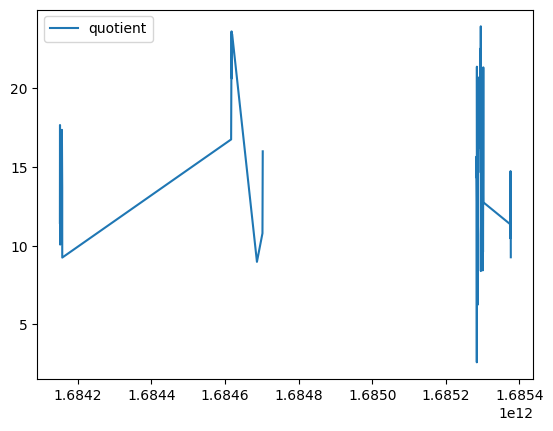

In [212]:
plt.plot(largeCorpusDf["timestamp"], largeCorpusDf["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

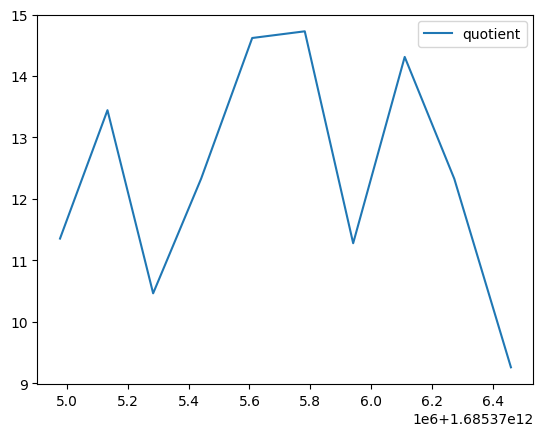

In [213]:
lastTen = largeCorpusDf.iloc[-10:]
plt.plot(lastTen["timestamp"], lastTen["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

In [214]:

lastTen

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
61,1685374976474,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,1287,69792,java,534,6147,1144409,8,19566,1154369,11.353831,323624.252837,3.674375e+06,11.353831
62,1685375132662,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,1257,142563,java,533,10604,1144409,8,19566,1154369,13.444266,158430.896193,2.129987e+06,13.444266
63,1685375282942,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,578,133721,java,536,12781,1144409,8,19566,1154369,10.462483,168906.782435,1.767184e+06,10.462483
64,1685375440986,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,799,142036,java,532,11519,1144409,8,19566,1154369,12.330585,159018.726619,1.960794e+06,12.330584
65,1685375608983,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,2061,154237,java,536,10550,1144409,8,19566,1154369,14.619621,146439.465589,2.140889e+06,14.619621
66,1685375781964,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,964,158832,java,536,10784,1144409,8,19566,1154369,14.728487,142202.980848,2.094435e+06,14.728487
67,1685375941270,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,747,142848,java,534,12666,1144409,8,19566,1154369,11.278068,158114.806326,1.783229e+06,11.278067
68,1685376110891,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,679,155193,java,535,10844,1144409,8,19566,1154369,14.311417,145537.387988,2.082846e+06,14.311416
69,1685376274062,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,1811,147868,java,535,11995,1144409,8,19566,1154369,12.327470,152746.935469,1.882983e+06,12.327470
70,1685376460471,8383FDD9-A509-4046-8F04-FD430BB07BA8,master,rmatch,2578,164391,java,536,17757,1144409,8,19566,1154369,9.257813,137394.284687,1.271971e+06,9.257814


In [215]:
import sqlite3

In [216]:


df = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')
print(df)


        timestamp                          testSeriesId metadata   
0   1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7   master  \
1   1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   master   
2   1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   master   
3   1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   master   
4   1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   master   
..            ...                                   ...      ...   
66  1685375781964  8383FDD9-A509-4046-8F04-FD430BB07BA8   master   
67  1685375941270  8383FDD9-A509-4046-8F04-FD430BB07BA8   master   
68  1685376110891  8383FDD9-A509-4046-8F04-FD430BB07BA8   master   
69  1685376274062  8383FDD9-A509-4046-8F04-FD430BB07BA8   master   
70  1685376460471  8383FDD9-A509-4046-8F04-FD430BB07BA8   master   

   matcherTypeName1  usedMemoryInMb1  durationInMillis1 matcherTypeName2   
0            rmatch              917               4475             java  \
1            rmatch            

In [217]:
import os
dbfile = 'measurements.sqlite'
if os.path.exists(dbfile):
    os.remove(dbfile)


In [218]:

table_name = 'Measurements'

query = f'Create table if not Exists {table_name} (timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,"2to1Ratio")'


In [219]:
conn = sqlite3.connect(dbfile)
conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

In [220]:
conn = sqlite3.connect(dbfile)
r_df = pd.read_sql("select * from Measurements",conn)
print(r_df)

        timestamp                          testSeriesId metadata   
0   1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7   master  \
1   1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   master   
2   1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   master   
3   1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   master   
4   1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   master   
..            ...                                   ...      ...   
66  1685375781964  8383FDD9-A509-4046-8F04-FD430BB07BA8   master   
67  1685375941270  8383FDD9-A509-4046-8F04-FD430BB07BA8   master   
68  1685376110891  8383FDD9-A509-4046-8F04-FD430BB07BA8   master   
69  1685376274062  8383FDD9-A509-4046-8F04-FD430BB07BA8   master   
70  1685376460471  8383FDD9-A509-4046-8F04-FD430BB07BA8   master   

   matcherTypeName1  usedMemoryInMb1  durationInMillis1 matcherTypeName2   
0            rmatch              917               4475             java  \
1            rmatch            

In [225]:
with open('summarize-large-corpus-trials.sql', 'r') as file:
    summarizerSql = file.read().rstrip()


In [226]:
summarizerSql

"select min(timestamp) as timestamp,\n       testSeriesId,\n       metadata,\n       noOfMatches,\n       noOfMismatches,\n       corpusLength,\n       noOfRegexps,\n       min(durationInMillis2) as 'minJavaDuration',\n       max(durationInMillis2) as 'maxJavaDuration',\n       avg(durationInMillis2) as 'avgJavaDuration',\n       min(durationInMillis1) as 'minRegexDuration',\n       max(durationInMillis1) as 'maxRegexDuration',\n       avg(durationInMillis1) as 'avgRegexuration',\n       stdev(durationInMillis2) as 'stdevJavaDuration',\n       stdev(durationInMillis1) as 'stdevRegexDuration',\n       ((1.0*min(durationInMillis1))/(1.0*min(durationInMillis2))) as 'minMinRatio',\n       ((1.0*max(durationInMillis1))/(1.0*max(durationInMillis2))) as 'maxMaxRatio',\n       ((1.0*avg(durationInMillis1))/(1.0*avg(durationInMillis2))) as 'avgAvgRatio'\n--       ((1.0*stdev(durationInMillis1))/(1.0*stdev(durationInMillis2))) as 'stdevStdevRatio'\nfrom Measurements  where timestamp >= 168529489

In [228]:

conn = sqlite3.connect(dbfile)
r_df = pd.read_sql(summarizerSql, conn)

print(r_df)
conn.close()


DatabaseError: Execution failed on sql 'select min(timestamp) as timestamp,
       testSeriesId,
       metadata,
       noOfMatches,
       noOfMismatches,
       corpusLength,
       noOfRegexps,
       min(durationInMillis2) as 'minJavaDuration',
       max(durationInMillis2) as 'maxJavaDuration',
       avg(durationInMillis2) as 'avgJavaDuration',
       min(durationInMillis1) as 'minRegexDuration',
       max(durationInMillis1) as 'maxRegexDuration',
       avg(durationInMillis1) as 'avgRegexuration',
       stdev(durationInMillis2) as 'stdevJavaDuration',
       stdev(durationInMillis1) as 'stdevRegexDuration',
       ((1.0*min(durationInMillis1))/(1.0*min(durationInMillis2))) as 'minMinRatio',
       ((1.0*max(durationInMillis1))/(1.0*max(durationInMillis2))) as 'maxMaxRatio',
       ((1.0*avg(durationInMillis1))/(1.0*avg(durationInMillis2))) as 'avgAvgRatio'
--       ((1.0*stdev(durationInMillis1))/(1.0*stdev(durationInMillis2))) as 'stdevStdevRatio'
from Measurements  where timestamp >= 1685294890722 group by testSeriesId  order by timestamp asc;': no such function: stdev

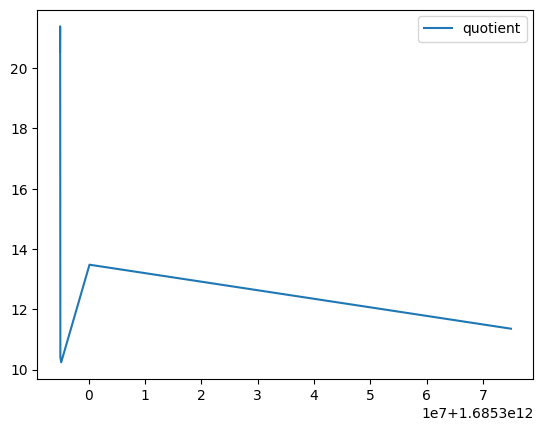

In [229]:
lastTen = r_df.iloc[-10:]
plt.plot(r_df["timestamp"], lastTen["minMinRatio"], label="quotient")
plt.legend()
plt.show()